In [1]:
import pyrho as rho
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fc = 5E6
fs = 150E6
nele = 128

In [3]:
t = np.arange(0, 8/fc, 1/fs).reshape((-1,1))
taus = 4/fc * np.ones((1, nele)) + 5E-1/fc*np.exp(((np.arange(nele)-(nele-1)/2)/(nele-1))**2)
def env(t):
    return np.cos(2*np.pi*fc*t) * np.exp(-(fc*t)**2)
traces = env(t-taus) * np.exp(-(4*(np.arange(nele)-(nele-1)/2)/nele)**2).reshape((1, nele))
rng = np.random.default_rng()
traces += rng.normal(0, 1E-3, traces.shape)

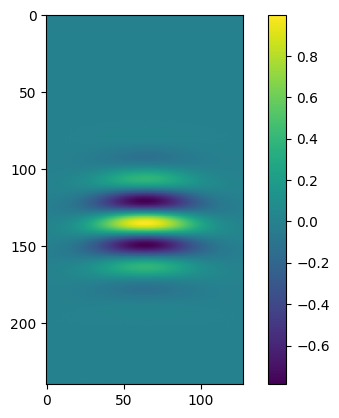

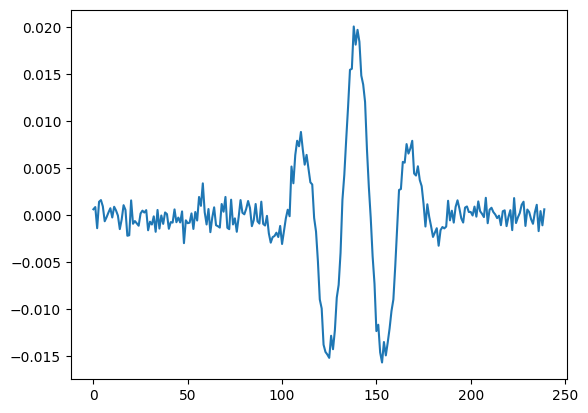

In [4]:
plt.figure()
plt.imshow(traces)
plt.colorbar()
plt.show()

plt.figure()
plt.plot(traces[:,0])
plt.show()

In [5]:
value = rho.lagNRho(traces, lag=1)
print(value)

0.997616171836853


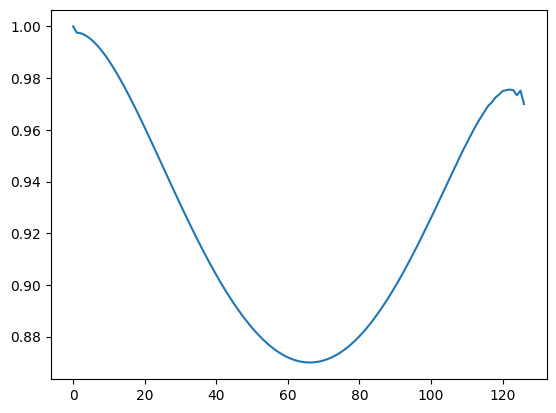

In [6]:
rhos = rho.RofM(traces)

plt.figure()
plt.plot(rhos)
plt.show()